
# 特征工程案例

## 机器学习（入门）      DC学院
## DC员工离职风险预测
## PART 1.数据的读取和简要理解
## 基础模块导入


In [57]:
import pandas as pd
import numpy as np

# 数据读取¶

In [58]:
# 训练集读取
train = pd.read_csv('G:/编程/python/教程/机器学习/特征工程案例/pfm_train.csv')
# 预测集读取
test = pd.read_csv('G:/编程/python/教程/机器学习/特征工程案例/pfm_test.csv')

# 数据信息的简要查看

In [59]:
# 训练集信息查看
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

In [60]:
# 预测集信息查看
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 30 columns):
Age                         350 non-null int64
BusinessTravel              350 non-null object
Department                  350 non-null object
DistanceFromHome            350 non-null int64
Education                   350 non-null int64
EducationField              350 non-null object
EmployeeNumber              350 non-null int64
EnvironmentSatisfaction     350 non-null int64
Gender                      350 non-null object
JobInvolvement              350 non-null int64
JobLevel                    350 non-null int64
JobRole                     350 non-null object
JobSatisfaction             350 non-null int64
MaritalStatus               350 non-null object
MonthlyIncome               350 non-null int64
NumCompaniesWorked          350 non-null int64
Over18                      350 non-null object
OverTime                    350 non-null object
PercentSalaryHike           350 non-null 

In [61]:
train.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7


In [62]:
# 输出训练集和测试集大小
print('train.shape:',train.shape)
print('test.shape:',test.shape)

train.shape: (1100, 31)
test.shape: (350, 30)


# 切分本地训练集和测试集¶

In [63]:
train_local = train.iloc[:1000]
test_local = train.iloc[1000:]

In [64]:
# 查看切分的训练集结果
train_local

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,0,Travel_Frequently,Research & Development,23,3,Life Sciences,159,1,Male,...,3,80,3,10,2,2,10,7,0,9
996,54,0,Travel_Rarely,Research & Development,22,5,Medical,1665,2,Female,...,3,80,1,36,6,3,10,8,4,7
997,36,0,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,80,1,17,3,3,5,2,0,3
998,24,0,Travel_Rarely,Research & Development,23,3,Medical,639,2,Male,...,2,80,2,6,3,3,6,5,1,4


In [65]:
# 查看切分的测试集结果
test_local

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1000,40,0,Travel_Frequently,Research & Development,16,4,Medical,832,1,Male,...,4,80,0,10,6,3,1,0,0,0
1001,42,0,Non-Travel,Research & Development,23,2,Life Sciences,1976,4,Male,...,4,80,0,20,2,3,20,9,3,7
1002,30,0,Travel_Rarely,Research & Development,24,1,Life Sciences,11,4,Male,...,2,80,1,1,2,3,1,0,0,0
1003,30,0,Travel_Frequently,Research & Development,2,4,Technical Degree,1745,4,Female,...,4,80,0,10,2,3,9,7,0,7
1004,55,0,Travel_Rarely,Research & Development,20,2,Technical Degree,389,2,Male,...,4,80,1,12,4,3,10,7,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,35,0,Travel_Rarely,Research & Development,23,4,Medical,75,3,Female,...,3,80,1,4,3,3,2,2,2,2
1096,38,0,Travel_Rarely,Sales,2,4,Marketing,1835,2,Female,...,1,80,2,20,4,2,4,2,0,3
1097,37,0,Travel_Rarely,Sales,16,4,Marketing,868,4,Male,...,4,80,2,9,2,3,1,0,0,0
1098,22,1,Travel_Rarely,Research & Development,7,1,Life Sciences,1878,4,Male,...,1,80,0,1,2,3,1,0,0,0


# 查看本地训练集和测试集的分布占比

In [66]:
np.mean(test_local['Attrition'])

0.14

In [67]:
np.mean(train_local['Attrition'])

0.164

# PART 2.特征处理阶段¶

In [68]:
# 定义统计列缺失函数
def col_miss(train_df):
    col_missing_df = train_df.isnull().sum(axis=0).reset_index()
    col_missing_df.columns = ['col','missing_count']
    col_missing_df = col_missing_df.sort_values(by='missing_count')
    return col_missing_df

# 查看特征列缺失情况

In [69]:
# 调用定义的 col_miss 函数
col_missing_df = col_miss(train_local)

In [70]:
col_missing_df

,col,missing_count
0,Age,0
28,YearsInCurrentRole,0
27,YearsAtCompany,0
26,WorkLifeBalance,0
25,TrainingTimesLastYear,0
24,TotalWorkingYears,0
23,StockOptionLevel,0
22,StandardHours,0
21,RelationshipSatisfaction,0
20,PerformanceRating,0


# 提取数值型特征

In [71]:
# 定义特征列类型匹配函数
def obtain_x(train_df,xtype):
    dtype_df = train_df.dtypes.reset_index()
    dtype_df.columns = ['col','type']
    return dtype_df[dtype_df.type!=xtype].col.values

In [72]:
# 调用定义的 obtain_x 函数 提取 非object 特征列名称
float64_col = obtain_x(train_local,'object') #float64 

In [73]:
float64_col

array(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [74]:
# 查看train_local 对应的 数值特征列
train_local[float64_col].iloc[1:3]

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,54,0,1,4,1245,4,3,3,3,10502,...,1,80,1,33,2,1,5,4,1,4
2,34,1,7,3,147,1,1,2,3,6074,...,4,80,0,9,3,3,9,7,0,6


# 查看数值型特征的分布情况

In [75]:
# 对于 本地训练集 train_local 查看其数值特征的统计性描述
train_local.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.945000,0.164000,9.286000,2.91200,1026.16100,2.729000,2.728000,2.066000,2.740000,6532.637000,...,2.685000,80.0,0.785000,11.256000,2.793000,2.7430,6.964000,4.222000,2.209000,4.094000
std,9.031808,0.370461,8.109869,1.02142,597.93442,1.092132,0.707472,1.112151,1.104364,4736.328863,...,1.092231,0.0,0.843497,7.889405,1.276629,0.6996,6.148374,3.663897,3.295479,3.610845
min,18.000000,0.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.00000,507.25000,2.000000,2.000000,1.000000,2.000000,2935.750000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.0000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.00000,1025.50000,3.000000,3.000000,2.000000,3.000000,4872.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.0000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.00000,1547.50000,4.000000,3.000000,3.000000,4.000000,8516.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.0000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.00000,2064.00000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.0000,37.000000,18.000000,15.000000,17.000000


In [76]:
# 对于 本地测试集 test_local 查看其数值特征的统计性描述
test_local.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,37.54000,0.140000,10.840000,3.030000,1048.120000,2.690000,2.760000,1.940000,2.660000,5993.460000,...,2.810000,80.0,0.820000,10.880000,2.950000,2.780000,7.490000,4.06000,2.400000,4.420000
std,9.11921,0.348735,8.940567,1.029416,611.330579,1.160764,0.698049,1.061921,1.165324,4492.811991,...,1.125418,0.0,0.845427,7.183426,1.431076,0.718866,6.942033,3.13604,3.504687,3.470452
min,22.00000,0.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1223.000000,...,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,31.00000,0.000000,2.000000,2.000000,467.250000,2.000000,2.000000,1.000000,2.000000,2888.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.750000,3.000000,2.00000,0.000000,2.000000
50%,36.00000,0.000000,7.500000,3.000000,1032.000000,3.000000,3.000000,2.000000,3.000000,4711.000000,...,3.000000,80.0,1.000000,9.500000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,42.00000,0.000000,18.250000,4.000000,1606.250000,4.000000,3.000000,2.000000,4.000000,6337.250000,...,4.000000,80.0,1.000000,13.000000,4.000000,3.000000,10.000000,7.00000,3.000000,7.000000
max,60.00000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19833.000000,...,4.000000,80.0,3.000000,36.000000,6.000000,4.000000,31.000000,13.00000,15.000000,13.000000


In [77]:
train.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [78]:
test.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,36.471429,8.391429,2.868571,1023.285714,2.714286,2.734286,2.068571,2.725714,6479.491429,2.691429,...,2.745714,80.0,0.817143,11.202857,2.782857,2.808571,6.782857,4.260000,1.951429,4.017143
std,9.373378,7.685318,1.029583,612.566819,1.067129,0.726669,1.089615,1.083437,4633.609813,2.456892,...,1.041226,0.0,0.886539,7.470399,1.295238,0.722488,5.489113,3.622336,2.752532,3.383720
min,18.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1051.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,463.250000,2.000000,2.000000,1.000000,2.000000,2888.750000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,7.000000,3.000000,1011.000000,3.000000,3.000000,2.000000,3.000000,5104.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,11.000000,4.000000,1584.500000,4.000000,3.000000,3.000000,4.000000,8260.250000,4.000000,...,4.000000,80.0,1.000000,15.750000,3.000000,3.000000,9.750000,7.000000,2.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19973.000000,9.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,29.000000,16.000000,15.000000,14.000000


In [79]:
# 导入绘图函数 为 特征的可视化分析做准备
import matplotlib.pyplot as plt

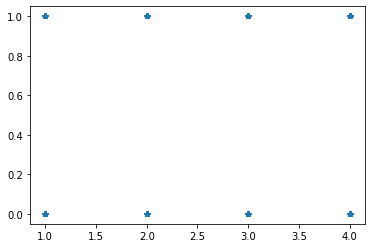

In [80]:
# 绘制特征和是否离职的关系
plt.plot(train_local['EnvironmentSatisfaction'],train_local['Attrition'],'*') #查看环境满意度和是否离职的关系
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


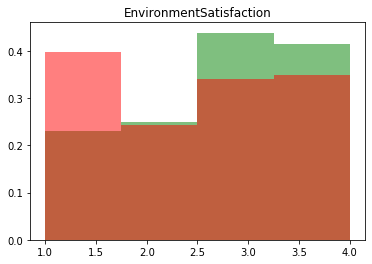

In [81]:
# 绘制两种类型（例子和未离职）的概率占比图
x1 = train_local[train_local['Attrition']==0].EnvironmentSatisfaction
x2 = train_local[train_local['Attrition']==1].EnvironmentSatisfaction

num_bins = 4
plt.hist(x1, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.hist(x2, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.title('EnvironmentSatisfaction')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


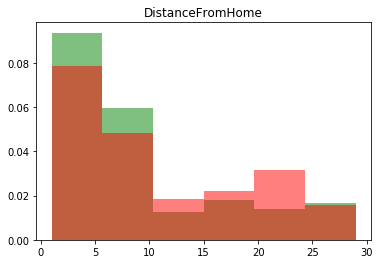

In [82]:
x1 = train_local[train_local['Attrition']==0].DistanceFromHome
x2 = train_local[train_local['Attrition']==1].DistanceFromHome

num_bins = 6
plt.hist(x1, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.hist(x2, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.title('DistanceFromHome')
plt.show()

# 提取非数值类型特征

In [83]:
# 定义特征列类型匹配函数
def obtain_x2(train_df,xtype):
    dtype_df = train_df.dtypes.reset_index()
    dtype_df.columns = ['col','type']
    return dtype_df[dtype_df.type==xtype].col.values

In [84]:
# 提取 object 类型的特征列名称
object_col = obtain_x2(train_local,'object')

In [85]:
object_col

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype=object)

In [86]:
train_local.isnull().sum()
#np.sum(train_local.isnull())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# PART 3.模型预测尝试¶
## LogisticRegression 模型尝试

In [87]:
# 导入逻辑回归函数和交叉验证函数
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import cross_val_score

In [88]:
## 将筛选的 数值型列 除取  Attrition列（标签列） 构造 训练特征集 和 训练标签集
x_col = [x for x in float64_col if x not in ['Attrition']]
len(x_col)
y_col = 'Attrition'
train_x = train_local[x_col]
train_y = train_local[y_col]

In [89]:
train_x

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,4,77,1,2,2,3,5993,1,...,3,80,1,7,2,4,7,5,0,7
1,54,1,4,1245,4,3,3,3,10502,7,...,1,80,1,33,2,1,5,4,1,4
2,34,7,3,147,1,1,2,3,6074,1,...,4,80,0,9,3,3,9,7,0,6
3,39,1,1,1026,4,2,4,4,12742,1,...,3,80,1,21,3,3,21,6,11,8
4,28,1,3,1111,1,2,1,2,2596,1,...,1,80,2,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,23,3,159,1,1,1,3,2613,1,...,3,80,3,10,2,2,10,7,0,9
996,54,22,5,1665,2,3,4,3,17426,3,...,3,80,1,36,6,3,10,8,4,7
997,36,23,2,2061,3,4,2,4,2571,4,...,3,80,1,17,3,3,5,2,0,3
998,24,23,3,639,2,4,1,4,2725,1,...,2,80,2,6,3,3,6,5,1,4


In [90]:
train_y

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Attrition, Length: 1000, dtype: int64

In [91]:
# 调用逻辑回归函数，并利用三折交叉验证方式做模型评判
train_x_0 = train_local[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','YearsSinceLastPromotion']]#RelationshipSatisfaction
train_y_0 = train_local[y_col]
clf = LogisticRegression(C=10)
clf.fit(train_x_0, train_y_0)
scores = cross_val_score(clf, train_x_0, train_y_0)
print(scores)
print(scores.mean())

[0.83532934 0.83832335 0.8373494 ]
0.8370006974003799


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

In [92]:
# 调用逻辑回归函数，并利用五折交叉验证方式做模型评判
train_x_0 = train_local[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','YearsSinceLastPromotion']]#RelationshipSatisfaction
train_y_0 = train_local[y_col]
clf = LogisticRegression(C=10)
clf.fit(train_x_0, train_y_0)
scores = cross_val_score(clf, train_x_0, train_y_0,cv=5)
print(scores)
print(scores.mean())

[0.8358209  0.835      0.835      0.835      0.83919598]
0.836003375084377


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [93]:
# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
#                    verbose=0, warm_start=False, n_jobs=1)
clf = LogisticRegression(C=10)
clf.fit(train_x, train_y)
scores = cross_val_score(clf, train_x, train_y)
print(scores.mean())

0.8489887694490538


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

In [94]:
# 生成本地验证测试集
test_x = test_local[x_col]
test_x.shape

(100, 22)

In [95]:
test_x

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1000,40,16,4,832,1,2,2,3,5094,6,...,4,80,0,10,6,3,1,0,0,0
1001,42,23,2,1976,4,2,2,3,4332,1,...,4,80,0,20,2,3,20,9,3,7
1002,30,24,1,11,4,3,1,3,2693,1,...,2,80,1,1,2,3,1,0,0,0
1003,30,2,4,1745,4,2,1,1,4968,0,...,4,80,0,10,2,3,9,7,0,7
1004,55,20,2,389,2,3,2,4,5415,3,...,4,80,1,12,4,3,10,7,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,35,23,4,75,3,3,1,1,4014,3,...,3,80,1,4,3,3,2,2,2,2
1096,38,2,4,1835,2,1,2,4,5405,2,...,1,80,2,20,4,2,4,2,0,3
1097,37,16,4,868,4,2,2,3,6334,4,...,4,80,2,9,2,3,1,0,0,0
1098,22,7,1,1878,4,3,1,2,2472,1,...,1,80,0,1,2,3,1,0,0,0


In [96]:
# 模型预测是否离职结果 Pre  和 离职概率；不离职概率
Pre = clf.predict(test_x)
PrePro = clf.predict_proba(test_x)

In [98]:
# out_csv

In [99]:
P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

NameError: name 'test_y' is not defined

# 加载数据预处理-归一化过程

In [ ]:
from sklearn import preprocessing

In [ ]:
print('build model...')
X = np.vstack((train_x,test_x))
# X = preprocessing.scale(X)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

train_x2 = X[0:len(train_x)]
test_x2 = X[len(train_x):]

In [ ]:
train_x2

In [ ]:
train_x2.shape

In [ ]:
test_x2

In [ ]:
test_x2.shape

In [ ]:
clf = LogisticRegression(C=10)
clf.fit(train_x2, train_y)
scores = cross_val_score(clf, train_x2, train_y)
print(scores.mean())

In [ ]:
Pre = clf.predict(test_x2)
PrePro = clf.predict_proba(test_x2)

In [ ]:
out_csv2 = pd.DataFrame()
out_csv2['True'] = test_local[y_col].values
out_csv2.shape
out_csv2['Pre'] = Pre
out_csv2['PrePro1'] = PrePro[:,0]
out_csv2['PrePro2'] = PrePro[:,1]

In [ ]:
out_csv2

# 预测结果分析

In [ ]:
P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

# 对于类别特征进行编码

In [ ]:
train_local['BusinessTravel']

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_local['BusinessTravel'])
a = le.transform(train_local['BusinessTravel'])
a

In [ ]:
enc = preprocessing.OneHotEncoder()  
enc.fit(a.reshape(-1, 1))
a2 = enc.transform(a.reshape(-1, 1)).toarray()

In [ ]:
a2

In [ ]:
a2.shape

In [ ]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()  

train2 = pd.DataFrame()
local_all = pd.concat([train_local,test_local],axis=0)

for col in object_col:
    le.fit(local_all[col])
    local_all[col] = le.transform(local_all[col])
    ohe.fit(local_all[col].reshape(-1, 1))
    ohecol = ohe.transform(local_all[col].reshape(-1, 1)).toarray()
    ohecol = pd.DataFrame(ohecol[:,1:],index=None)#columns=col+le.classes_
    ohecol.columns = ohecol.columns.map(lambda x:str(x)+col)
    train2 = pd.concat([train2, ohecol],axis=1, ignore_index=False)

In [ ]:
train2

In [ ]:
len(object_col)

In [ ]:
train2.columns
train2.shape

In [ ]:
train_local2 = train2.iloc[0:len(train_local)]
test_local2 = train2.iloc[len(train_local):]

In [ ]:
train_local2.shape

In [ ]:
x_col2 = [x for x in train_local2.columns if x not in ['Attrition']]
len(x_col)
y_col = 'Attrition'
train_x3 = train_local2[x_col2]
train_y = train_local[y_col]

test_x3 = test_local2[x_col2]

In [ ]:
train_x3

In [ ]:
train_x3.shape

In [ ]:
clf = LogisticRegression(C=10)
clf.fit(train_x3, train_y)
scores = cross_val_score(clf, train_x3, train_y)##交叉验证
print(scores.mean())

In [ ]:
Pre = clf.predict(test_x3)
PrePro = clf.predict_proba(test_x3)

In [ ]:
out_csv3 = pd.DataFrame()
out_csv3['True'] = test_local[y_col].values
out_csv3.shape
out_csv3['Pre'] = Pre
out_csv3['PrePro1'] = PrePro[:,0]
out_csv3['PrePro2'] = PrePro[:,1]

In [ ]:
P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

In [ ]:
# 合并 数值型特征 和 非数值型特征类别编码 
trian0 = pd.DataFrame(X,columns=x_col)
# trian0.columns = ohecol.columns.map(lambda x:str(x)+col)
train_all = pd.concat([trian0,train2],axis=1)
train_all

In [ ]:
train_local4 = train_all.iloc[0:len(train_local)]
test_local4 = train_all.iloc[len(train_local):]

train_x3 = train_local4
test_x3 = test_local4

In [ ]:
clf = LogisticRegression(C=10)
clf.fit(train_x3, train_y)
scores = cross_val_score(clf, train_x3, train_y)
print(scores.mean())

In [ ]:
Pre = clf.predict(test_x3)
PrePro = clf.predict_proba(test_x3)

In [ ]:
out_csv3 = pd.DataFrame()
out_csv3['True'] = test_local[y_col].values
out_csv3.shape
out_csv3['Pre'] = Pre
out_csv3['PrePro1'] = PrePro[:,0]
out_csv3['PrePro2'] = PrePro[:,1]

In [ ]:
P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

# 特征工程筛选
## 利用特征的统计信息进行特征选择

In [ ]:
# 移除低方差特征
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold()
train_all_sel = sel.fit_transform(train_all)
train_all.shape

In [ ]:
train_all_sel.shape

In [ ]:
train_all_sel

In [ ]:
# 定义特征统计函数
def col_Sta(train_df):
    col_sta = pd.DataFrame(columns = ['_columns','_min','_max','_median','_mean','_ptp','_std','_var'])
    for col in train_df.columns:
        col_sta = col_sta.append({'_columns':col,'_min':np.min(train_df[col]),'_max':np.max(train_df[col]),\
            '_median':np.median(train_df[col]),'_mean':np.mean(train_df[col]),\
            '_ptp':np.ptp(train_df[col]),'_std':np.std(train_df[col]),'_var':np.var(train_df[col])},ignore_index=True)
    return col_sta

In [ ]:
train_col_sta = col_Sta(train_local4)
test_col_sta = col_Sta(test_local4)

In [ ]:
train_col_sta

In [ ]:
test_col_sta

In [ ]:
varzero_col = train_col_sta[train_col_sta['_var']==0]._columns

varzero_col.values

In [ ]:
feature_end = [x for x in train_local4.columns if x not in varzero_col.values]

np.size(feature_end)

In [ ]:
train_local4[feature_end]

In [ ]:
from sklearn.feature_selection import chi2#调用卡方信息量

In [ ]:
chi2_col,pval_col = chi2(train_local4[feature_end].values,train_y)

np.size(chi2_col)

In [ ]:
from sklearn.feature_selection import f_classif#调用f信息量

In [ ]:
f_col,pval_col = f_classif(train_local4[feature_end].values,train_y)

f_col

In [ ]:
from sklearn.feature_selection import mutual_info_classif#调用互信息

In [ ]:
mic_col = mutual_info_classif(train_local4[feature_end].values,train_y)

feature_all = feature_end

feature_sel = pd.DataFrame()
print('len feature_all:',len(feature_all))
print('len feature_chi2:',len(chi2_col))
print('len feature_f:',len(f_col))
print('len feature_mic:',len(mic_col))
#feature_RF = pd.DataFrame(feature_RF)
feature_sel['feature'] = feature_all
feature_sel['chi2_import'] = chi2_col
feature_sel['f_import'] = f_col
feature_sel['mic_import'] = mic_col

In [ ]:
feature_sel


# 利用随机深林进行特征选择¶

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_split=2, random_state=0)
clf = clf.fit(train_local4[feature_end], train_y)
scores = cross_val_score(clf, train_local4[feature_end], train_y)
print(scores.mean())

In [ ]:
Pre = clf.predict(test_local4[feature_end])
PrePro = clf.predict_proba(test_local4[feature_end])

In [ ]:
out_csv3 = pd.DataFrame()
out_csv3['True'] = test_local[y_col].values
out_csv3.shape
out_csv3['Pre'] = Pre
out_csv3['PrePro1'] = PrePro[:,0]
out_csv3['PrePro2'] = PrePro[:,1]

P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

In [ ]:
clf.feature_importances_

In [ ]:
np.size(clf.feature_importances_)

# 组合筛选

In [ ]:
feature_RF =clf.feature_importances_

print('len feature_RF:',len(feature_RF))
#feature_RF = pd.DataFrame(feature_RF)
feature_sel['RF_import'] = feature_RF

In [ ]:
feature_sel

In [ ]:
feature_a = feature_sel[(feature_sel['RF_import']>=0.01) | (feature_sel['chi2_import']>=2) | (feature_sel['mic_import']>=0.01)].feature.values
np.size(feature_a)

In [ ]:
feature_a

In [ ]:
feature_a = feature_sel[(feature_sel['RF_import']>=0.01)].feature.values
np.size(feature_a)

In [ ]:
clf = LogisticRegression(C=10)
clf.fit(train_x3[feature_a], train_y)
scores = cross_val_score(clf, train_x3[feature_a], train_y)
print(scores.mean())

In [ ]:
Pre = clf.predict(test_x3[feature_a])
PrePro = clf.predict_proba(test_x3[feature_a])

In [ ]:
out_csv3 = pd.DataFrame()
out_csv3['True'] = test_local[y_col].values
out_csv3.shape
out_csv3['Pre'] = Pre
out_csv3['PrePro1'] = PrePro[:,0]
out_csv3['PrePro2'] = PrePro[:,1]

P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

In [ ]:
#生成预测文件
Pre = pd.DataFrame(Pre,index=None)
Pre.to_csv('BLV1.0.csv',index =False)

# End V1.0....

## 文档
